# Ecuaciones Diferenciales Parciales
Del conjunto de funciones que representan a las ecuaciones diferenciales ordinarias, existe un subconjunto de paricular de ecuaciones diferenciales parciales de segundo orden cuya forma es:
$$A\frac{\partial^2u}{\partial x^2}+B\frac{\partial^2u}{\partial x\partial y}+C\frac{\partial^2u}{\partial y^2}+D\frac{\partial u}{\partial x}+E\frac{\partial u}{\partial y}+Fu=G$$

donde $A,B,C,D,E,G$ son funciones de $x$ y $y$. Es posible clasificar estas ecuaciones como:

$$\begin{array}{lr}
hiperbólicas & B^2-4AC>0\\
parabólicas &  B^2-4AC=0\\
elípticas &  B^2-4AC<0\\
\end{array}$$

Las ecuaciones hiperbólicas se utilizan normalmente cuando se presentan fenómenos de propagación de ondas, como luz o sonido. Las parabolicas se utilian para describir fenómenos de difusión y transporte como calor o concentración. Las elípticas se pueden encontrar aplicadas a estudiar estados de equilibrio como en el caso de potencailes electroestáticos o distribución de temperaturas en estados estacionarios.

## Ecuación de Calor
La ecuación de transmisión de calor en una dimensión se escrita como 
$$c\frac{\partial^2u}{\partial x^2}+\frac{\partial u}{\partial t}$$
con condiciones a la frontera $u(0,t)=u_1$ y $u(a,t)=u_2$ para $t>0$ y una condición inicial $u(x,0)=f(x)$ con $0<x<a$.

### Método explicito de diferencias finitas
Es posible discretizarla por medio de la aproximación por diferencias finitas centradas como
$$\frac{\partial^2u}{\partial x^2}\approx \frac{1}{h^2}[u(x+h,t)-2u(x,t)+u(x-h,t)]$$
y la aproximación por diferencias finitas hacia adelante:
$$\frac{\partial u}{\partial t}\approx \frac{1}{k}[u(x,t+k)-u(x,t)]$$
obteniendo una expresión para la función evaluada en una posición $i+1$ y un tiempo $j+1$ como
$$u_{i}^{j+1}=\lambda u_{i+1}^{j}+(1-2\lambda)u_i^j+\lambda u_{i-1}^{j}$$
 donde $\lambda=ck/h^2$.
La representación de esta ecuación está en un espacio que depende de $x$, la variables espacial, y $t$ la variable temporal y cuya solución está limitada por las condiciones a la frontera e iniciales. En el caso de la variable espacial, $x$ solo puede solucionarse entre los valores $x=0$ y los valores $x=a$; mientras que para la variable temporal las soluciones estana cotadas para cualquier tiempo $t\geq0$ como se muestra en la figura.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP1.png?raw=true" width="300">
<center>

Para poder solucionar numericamente esta ecuación se utilizan los valores de las diferencias finitas centradas en $i-1,\,i$ e $i+1$ para algun $j$ con el objetivo de calcular la solución en $j+1$ para cualquier $i$. Un esquema representativo de este procedimiento se muestra en la figura
<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP2.png?raw=true" width="300">
<center>    

### Ejemplo:
Considera el problema con valores a la frontera:
$$\begin{array}{lll} \frac{\partial^2u}{\partial x^2}=\frac{\partial u}{\partial t}, & 0<x<1,&\;0<t<0.5\\
u(0,t)=0,& u(1,t), &0\leq t\leq 0.5\\
u(x,0)=\text{sen}\,\pi x,&0\leq x\leq1
\end{array}$$

En este caso $c=1$, $a=1$ y $T=0.5$. Supongamos $n=5$ y $m=50$ tal que $h=1/5$, $k=0.5/50$ y $\lambda=0.25$. Entonces $x_i=i\frac{1}{5}$ para $i=0,1,2,3,4,5$ y $t_j=j\frac{1}{100}$ para $j=0,1,2,...,50$. Graficar la solución.

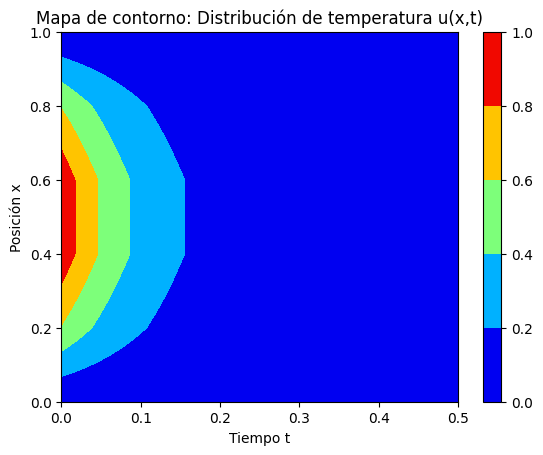

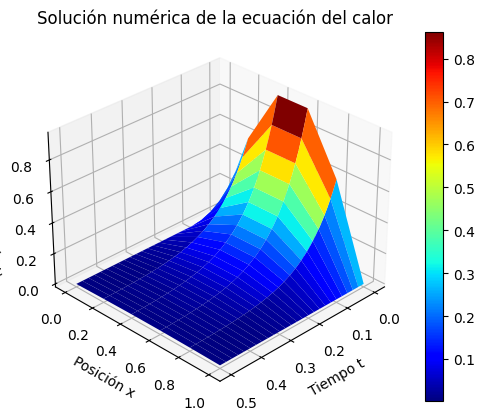

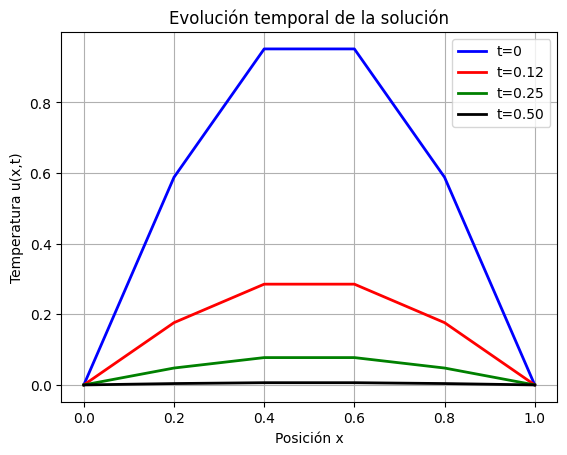

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del problema
c = 1           # Coeficiente de la ecuación
a = 1           # Longitud del dominio espacial
T = 0.5         # Tiempo final

n = 5           # Número de divisiones espaciales
m = 50          # Número de divisiones temporales
h = a / n       # Tamaño del paso espacial
k = T / m       # Tamaño del paso temporal
lmbda = c**2 * k / h**2  # Parámetro lambda

# Verificación de la estabilidad (comentado como en MATLAB)
# if lmbda > 0.5:
#     print('Warning: El esquema puede ser inestable. Considere reducir k o aumentar h.')

# Creación de la malla
x = np.linspace(0, a, n+1)    # Puntos espaciales (0 a 1 con n+1 puntos)
t = np.linspace(0, T, m+1)    # Puntos temporales (0 a 0.5 con m+1 puntos)

# Inicialización de la solución
u = np.zeros((n+1, m+1))      # Matriz para almacenar la solución

# Condición inicial
u[:, 0] = np.sin(np.pi * x)   # u(x,0) = sen(πx)

# Condiciones de frontera
u[0, :] = 0                   # u(0,t) = 0
u[-1, :] = 0                  # u(1,t) = 0

# Método de diferencias finitas explícito
for j in range(m):
    for i in range(1, n):
        u[i, j+1] = u[i, j] + lmbda * (u[i+1, j] - 2*u[i, j] + u[i-1, j])

# Gráfica de contorno (x vs t)
plt.figure()
cont = plt.contourf(t, x, u, levels=5, cmap='jet')
plt.colorbar(cont)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Mapa de contorno: Distribución de temperatura u(x,t)')

# Gráfica de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T_grid, X_grid = np.meshgrid(t, x)
surf = ax.plot_surface(T_grid, X_grid, u, cmap='jet', edgecolor='none')
fig.colorbar(surf)
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('Temperatura u(x,t)')
ax.set_title('Solución numérica de la ecuación del calor')
ax.view_init(30, 45)

# Gráfica de evolución temporal
plt.figure()
plt.plot(x, u[:, 0], 'b-', linewidth=2, label='t=0')
plt.plot(x, u[:, round(m/4)], 'r-', linewidth=2, label=f't={t[round(m/4)]:.2f}')
plt.plot(x, u[:, round(m/2)], 'g-', linewidth=2, label=f't={t[round(m/2)]:.2f}')
plt.plot(x, u[:, -1], 'k-', linewidth=2, label=f't={T:.2f}')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x,t)')
plt.title('Evolución temporal de la solución')
plt.legend()
plt.grid(True)

plt.show()

## Método de Crank-Nicholson
Introducido por J. Crank y P. Nicholson en 1947, se usa más que nada para resolver la ecuación de calor. El algoritmo consiste en remplazar la segunda derivada parcial en $c\frac{\partial^2u}{\partial x^2}=\frac{\partial u}{\partial t}$ por un promedio de los cocientes en diferencias centrales, uno se evalúa en $t$ y el otro en $t+k$:
$$\frac{c}{2}\left[ \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}+\frac{u(x+h,t+k)-2u(x,t+k)+u(x-h,t+k)}{h^2} \right]=\frac{1}{k}[u(x,t+k)-u(x,t)]$$
donde de  nuevo $\lambda=ck/h^2$
$$-u_{i-1}^{j+1}+\alpha u_{i}^{j+1}-u_{i+1}^{j+1}=u_{i+1}^{j}-\beta u_i^j+u_{i-1}^j$$
donde $\alpha=2(1+1/\lambda)$ y $\beta=2(1-1/\lambda)$ para $j=0,1,...,m-1$ e $i=0,1,...,n-1$. Esquematicamente, se calcula un punto intermedio entre $j$ y $j+1$.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP3.png?raw=true" width="300">
<center> 

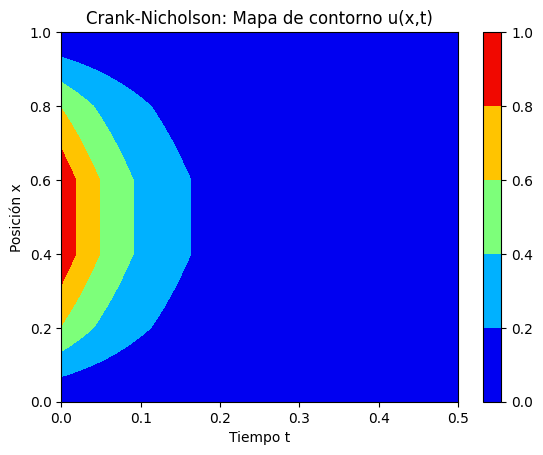

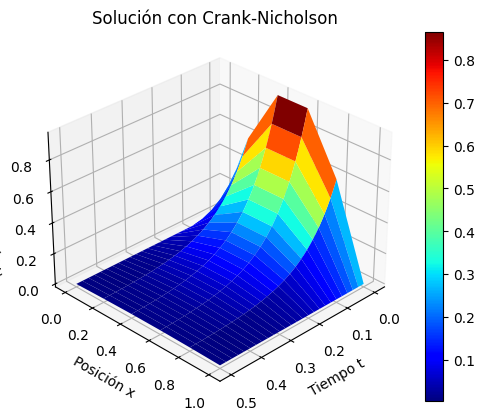

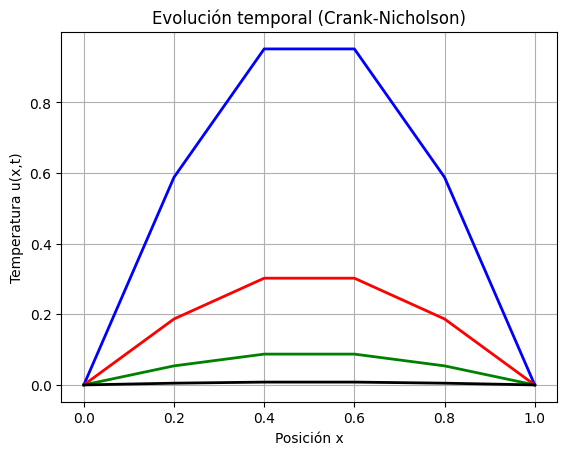

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del problema
c = 1           # Coeficiente de la ecuación
a = 1           # Longitud del dominio espacial
T = 0.5         # Tiempo final

n = 5           # Número de divisiones espaciales
m = 50          # Número de divisiones temporales
h = a / n       # Tamaño del paso espacial
k = T / m       # Tamaño del paso temporal
lmbda = c**2 * k / (2 * h**2)  # Parámetro lambda para Crank-Nicholson

# Creación de la malla
x = np.linspace(0, a, n+1)    # Puntos espaciales
t = np.linspace(0, T, m+1)    # Puntos temporales

# Inicialización de la solución
u = np.zeros((n+1, m+1))      # Matriz para almacenar la solución

# Condición inicial
u[:, 0] = np.sin(np.pi * x)   # u(x,0) = sen(πx)

# Condiciones de frontera
u[0, :] = 0                   # u(0,t) = 0
u[-1, :] = 0                  # u(1,t) = 0

# Construcción de las matrices del sistema
main_diag = (1 + 2*lmbda) * np.ones(n-1)
off_diag = -lmbda * np.ones(n-2)

# Matriz A
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Matriz B
B = np.diag((1 - 2*lmbda) * np.ones(n-1)) + np.diag(lmbda * np.ones(n-2), k=1) + np.diag(lmbda * np.ones(n-2), k=-1)

# Resolución del sistema en cada paso de tiempo
for j in range(m):
    # Término independiente
    b = B @ u[1:-1, j]
    
    # Resolución del sistema lineal (usando solve en lugar del operador \ de MATLAB)
    u[1:-1, j+1] = np.linalg.solve(A, b)

# Gráfica de contorno
plt.figure()
cont = plt.contourf(t, x, u, levels=5, cmap='jet')
plt.colorbar(cont)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Crank-Nicholson: Mapa de contorno u(x,t)')

# Gráfica de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T_grid, X_grid = np.meshgrid(t, x)
surf = ax.plot_surface(T_grid, X_grid, u, cmap='jet', edgecolor='none')
plt.colorbar(surf)
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('Temperatura u(x,t)')
ax.set_title('Solución con Crank-Nicholson')
ax.view_init(30, 45)

# Gráfica de evolución temporal
plt.figure()
plt.plot(x, u[:, 0], 'b-', linewidth=2, label='t=0')
plt.plot(x, u[:, round(m/4)], 'r-', linewidth=2, label=f't={t[round(m/4)]:.2f}')
plt.plot(x, u[:, round(m/2)], 'g-', linewidth=2, label=f't={t[round(m/2)]:.2f}')
plt.plot(x, u[:, -1], 'k-', linewidth=2, label=f't={T:.2f}')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x,t)')
plt.title('Evolución temporal (Crank-Nicholson)')
# plt.legend(loc='northeast')
plt.grid(True)

plt.show()